<a href="https://colab.research.google.com/github/abbos-trnv/abbos-trnv/blob/main/Analytics_HW1_Turgunov_Abbos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в аналитику. Домашнее задание - 1

Мы будем работать с датасетом про покупки клиентов в онлайн-магазине. По характеристикам клиентов нам нужно понять, купит клиент товар или нет.

Целевая величина - Revenue (факт покупки).

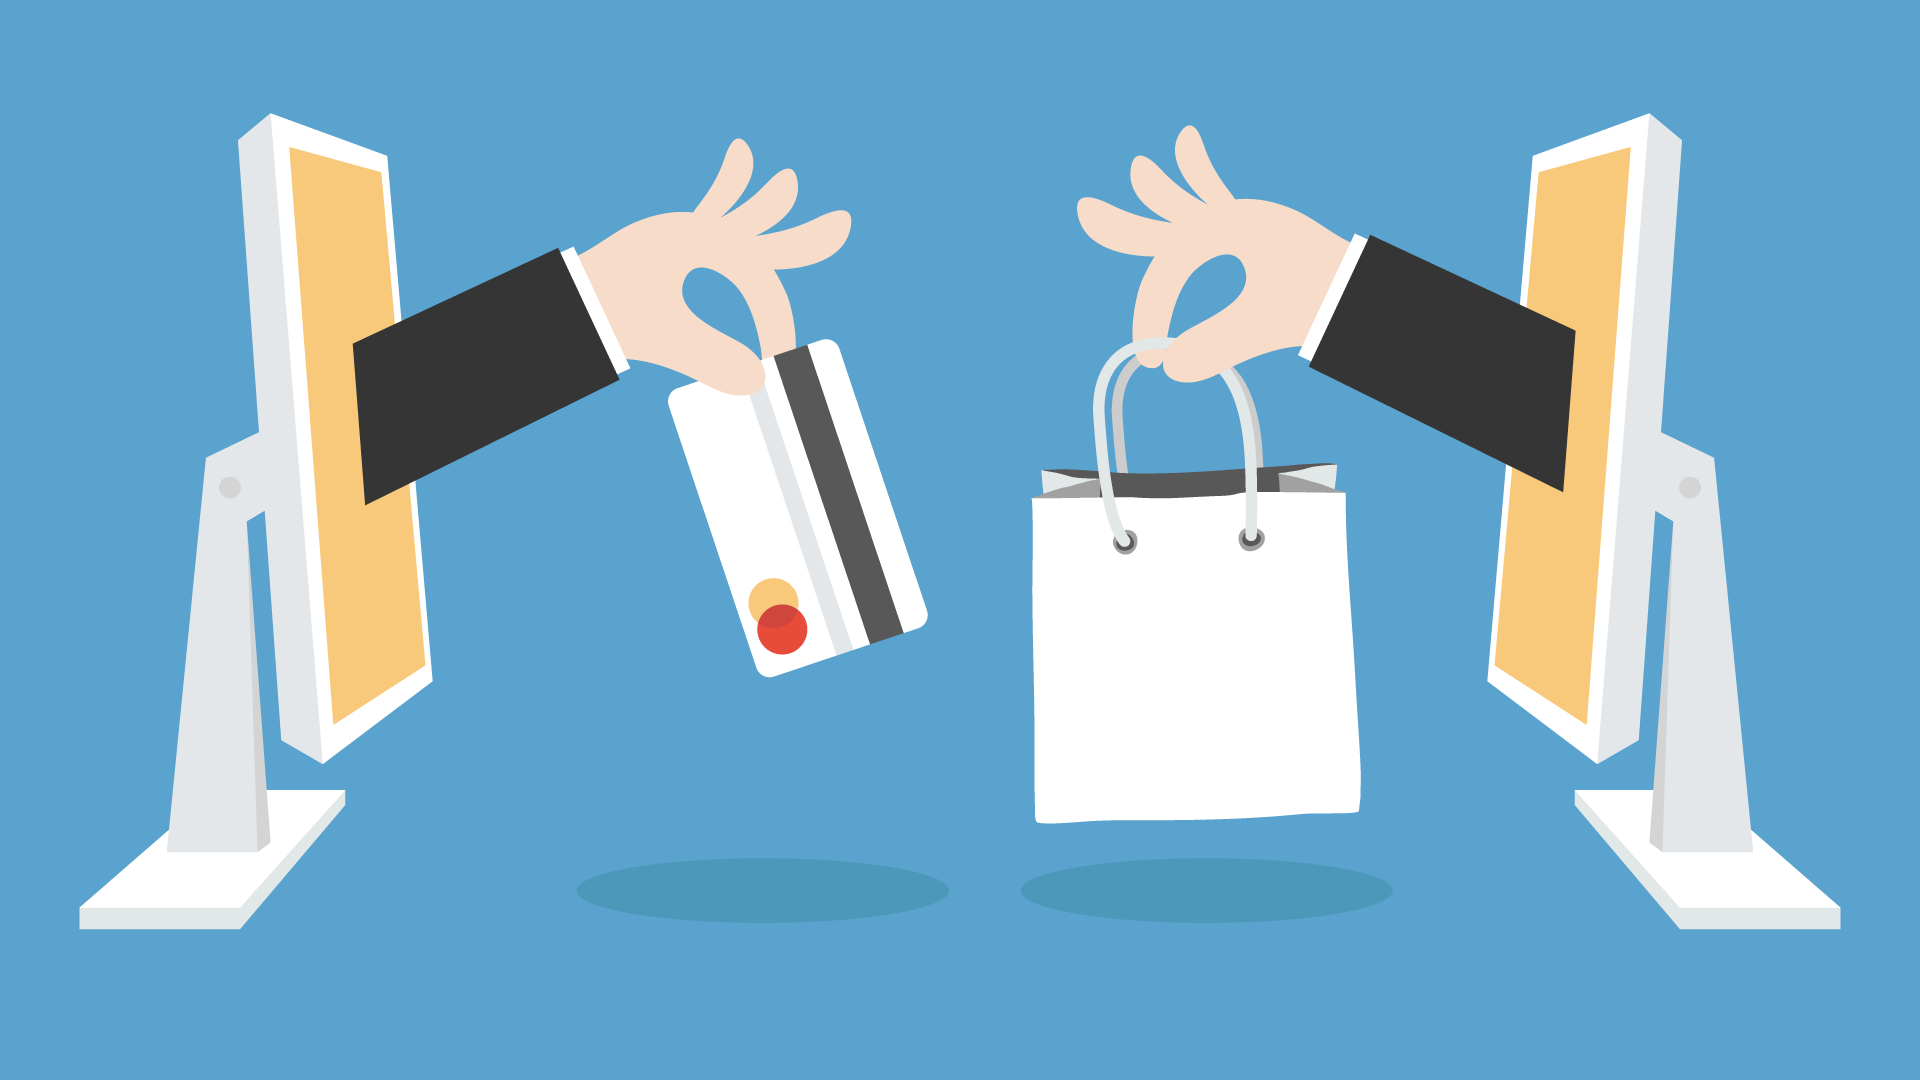

Задания ноутбука проверяются в гугл-формах в полуавтоматическом режиме. Ответы на вопросы, а также ссылку на ноутбук с выполненным домашнем задании в google colab прикрепите в [эту форму](https://docs.google.com/forms/d/e/1FAIpQLSdo_QG4Msqsvxhbd-GsAr8orBhByo1Sg9Y4RtzBX2w5FN43QQ/viewform?usp=sf_link).

* Задание 0 не оценивается
* Задания 1-16 весят 1 балл
* Задания 17-18 весят по 2 балла

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Описание данных

**Online Shoppers Purchasing Intention Dataset**

The `Revenue` attribute can be used as the class label.

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Задание 0

Изучите данные:

* Посмотрите на названия колонок

* Выведите на экран 10 случайных строк таблицы

* Посмотрите на размер таблицы

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9965,0,0.000000,0,0.000000,35,2381.097222,0.005714,0.021959,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,False
10457,0,0.000000,0,0.000000,6,163.000000,0.000000,0.033333,0.000000,0.0,Dec,2,4,6,1,Returning_Visitor,False,False
10931,3,107.400000,0,0.000000,14,382.033333,0.000000,0.021429,0.000000,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
10983,0,0.000000,0,0.000000,51,2786.916667,0.003922,0.011765,0.000000,0.0,Nov,2,2,1,3,Returning_Visitor,False,False
6738,0,0.000000,0,0.000000,53,1121.433333,0.007843,0.019608,24.573496,0.0,Jul,2,4,9,1,Returning_Visitor,False,True
2775,5,103.000000,0,0.000000,16,399.000000,0.021053,0.056140,0.000000,0.0,May,2,5,1,19,Returning_Visitor,False,False
79,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,1,1,1,3,Returning_Visitor,False,False
8374,0,0.000000,4,102.000000,93,2835.417641,0.007544,NaN,0.000000,0.0,Dec,2,2,4,1,Returning_Visitor,False,False
11022,0,0.000000,0,0.000000,1,NaN,0.200000,0.200000,0.000000,0.0,Dec,2,2,2,3,Returning_Visitor,False,False
1471,4,66.333333,2,58.166667,38,1524.702381,0.000000,0.006629,0.000000,0.0,aug,2,2,3,2,New_Visitor,True,False


In [ ]:
df.shape


(12330, 18)

## Исследование данных

## Задание 1

В скольких столбцах таблицы есть пропущенные значения?

In [ ]:
df.isnull().any().sum()

3

## Задание 2

В скольких числовых столбцах медиана больше среднего значения?

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns

medians = df[numeric_columns].median()
means = df[numeric_columns].mean()

sum(medians > means)

0

## Задание 3

Сколько дублирующихся строк в данных? Ответьте на вопрос, а затем удалите дубликаты.

In [ ]:
df.duplicated().sum()

109

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Однофакторный анализ

Начнём с анализа признака Product Related Duration.

## Задание 4

Постройте гистограмму распределения признака Product Related Duration.

Что можно сказать по гистограмме?

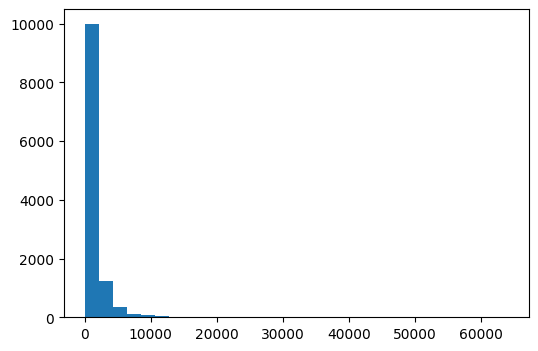

In [ ]:
plt.figure(figsize=(6, 4))

plt.hist(df['ProductRelated_Duration'], bins=30)
plt.show()

## Задание 5

Какая доля среди всех клиентов провела 0 минут/секунд на страницах, посвященных продукту? Ответ переведите в проценты и округлите до целого числа.

In [ ]:
ProdRelDur_zero_rate = df[df.ProductRelated_Duration == 0].shape[0] / df.shape[0] * 100

round(ProdRelDur_zero_rate)

6

## Задание 6

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.


<ipython-input-12-9aaa295af586>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')


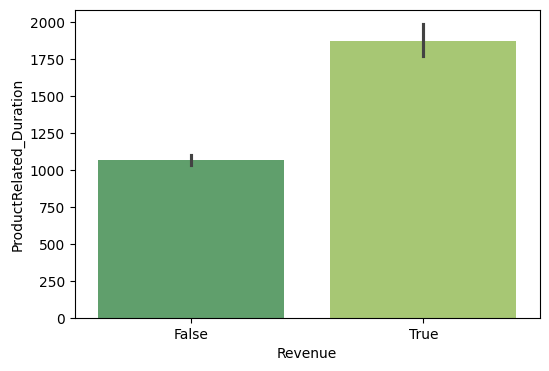

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')
plt.show()

## Задание 7

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

Гистограмма показывает, что чем больше клиент проводит времени на странице продукта, тем выше вероятность, что покупка будет совершена.

Сформулируем гипотезу:

1. Время, проведенное на странице продукта, влияет на решение клиента купить этот продукт.

2. Формулируем нулевую и альтернативную гипотезы:

$H_0: \mu_0 = \mu_1,$ где $\mu_0$ - среднее время среди тех кто купил и $\mu_1$ - среднее время среди тех кто не купил

$H_a: \mu_0 \neq \mu_1$

3. Зададим уровень значимости:

Возьмем a = 0.95

Для начала решим вопрос со строками с пропущенными значениями

In [ ]:
df[df.isna().any(axis=1)].sample(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3285,0,0.000000,0,0.0,1,0.000000,0.200000,NaN,0.000000,0.0,May,3,2,9,13,Returning_Visitor,False,False
4542,3,377.000000,0,0.0,14,NaN,0.000000,0.013333,0.000000,0.0,May,1,1,8,15,New_Visitor,True,False
8947,4,26.000000,0,0.0,235,NaN,0.007671,0.022528,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
322,0,0.000000,0,0.0,10,NaN,0.000000,0.020000,0.000000,0.0,Mar,2,2,9,2,Returning_Visitor,False,False
9210,9,509.833333,2,23.0,27,NaN,0.020952,0.043333,0.000000,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
10364,2,131.500000,0,NaN,26,1960.475000,0.007407,0.024074,33.692332,0.0,Nov,1,1,1,2,Returning_Visitor,False,True
724,0,0.000000,0,0.0,1,NaN,0.200000,0.200000,0.000000,0.0,Mar,1,1,2,1,Returning_Visitor,False,False
9571,14,243.166667,0,0.0,34,NaN,0.000000,0.016216,0.000000,0.0,Dec,4,5,3,1,Returning_Visitor,False,False
7692,4,190.500000,0,0.0,29,867.991515,0.012903,NaN,0.000000,0.0,Sep,3,2,3,4,Returning_Visitor,False,False
7529,0,0.000000,0,0.0,48,NaN,0.008511,0.044681,0.000000,0.0,Jul,2,2,5,1,Returning_Visitor,False,False


Так как пропущенные значения только в 3 столбцах заметим, что в столбце productRelated(количество посещенных страниц клиентом в течение одной сессии) нет пропущенных значения и по идее, там где значение > 0, в столбце ProductRelated_Duration значения тоже должны быть ненулевые
Поэтому пустые клетки в ProdRelDur заменим на средние значения, при параметре Revenue.

In [ ]:
# Вычисление среднего значения для групп с Revenue == 1 и Revenue == 0
mean_duration_revenue_1 = df[df['Revenue'] == 1]['ProductRelated_Duration'].mean()
mean_duration_revenue_0 = df[df['Revenue'] == 0]['ProductRelated_Duration'].mean()

# Замена пропущенных значений на среднее значение для соответствующей группы
df.loc[(df['Revenue'] == 1) & (df['ProductRelated_Duration'].isnull()), 'ProductRelated_Duration'] = mean_duration_revenue_1
df.loc[(df['Revenue'] == 0) & (df['ProductRelated_Duration'].isnull()), 'ProductRelated_Duration'] = mean_duration_revenue_0

# Проверка, что пропущенные значения заменены
print(df.isnull().sum())


Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64


Теперь проверим не изменилась ли гистограмма влияния ProductRelatedDuration на Revenue

<ipython-input-15-9aaa295af586>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')


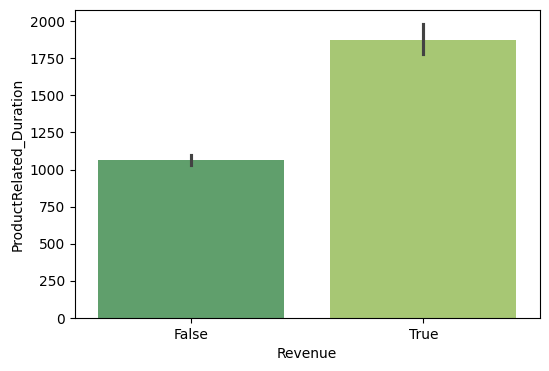

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')
plt.show()

Вот теперь проведем проверку гипотезы

In [ ]:
from scipy import stats

# Выделение данных для двух групп
sample1 = df[df['Revenue'] == 1]['ProductRelated_Duration']
sample2 = df[df['Revenue'] == 0]['ProductRelated_Duration']

# Проведение t-теста для независимых выборок
t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)  # equal_var=True предполагает равенство дисперсий

# Вывод результатов
print("T-статистика:", t_stat)
print("P-значение:", p_value)

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Различие статистически значимо")
else:
    print("Различие не является статистически значимым")


T-статистика: 17.582051651307424
P-значение: 2.302686937443124e-68
Различие статистически значимо


## Задание 8

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

t-тест применяется для количественных данных, таких как время, проведенное на странице продукта, которое вы сравниваете между двумя группами и если есть статистически значимое различие между средними значениями двух независимых групп, t-тест является подходящим инструментом.Также группы являются независимыми. И условия нормальности, дисперсии.

## Задание 9

Постройте матрицу корреляций всех числовых столбцов друг с другом. Используйте корреляцию Спирмена.

Какой столбец наиболее сильно коррелирует с Revenue? В ответе укажите значение коэффициента корреляции, округленного до сотых.

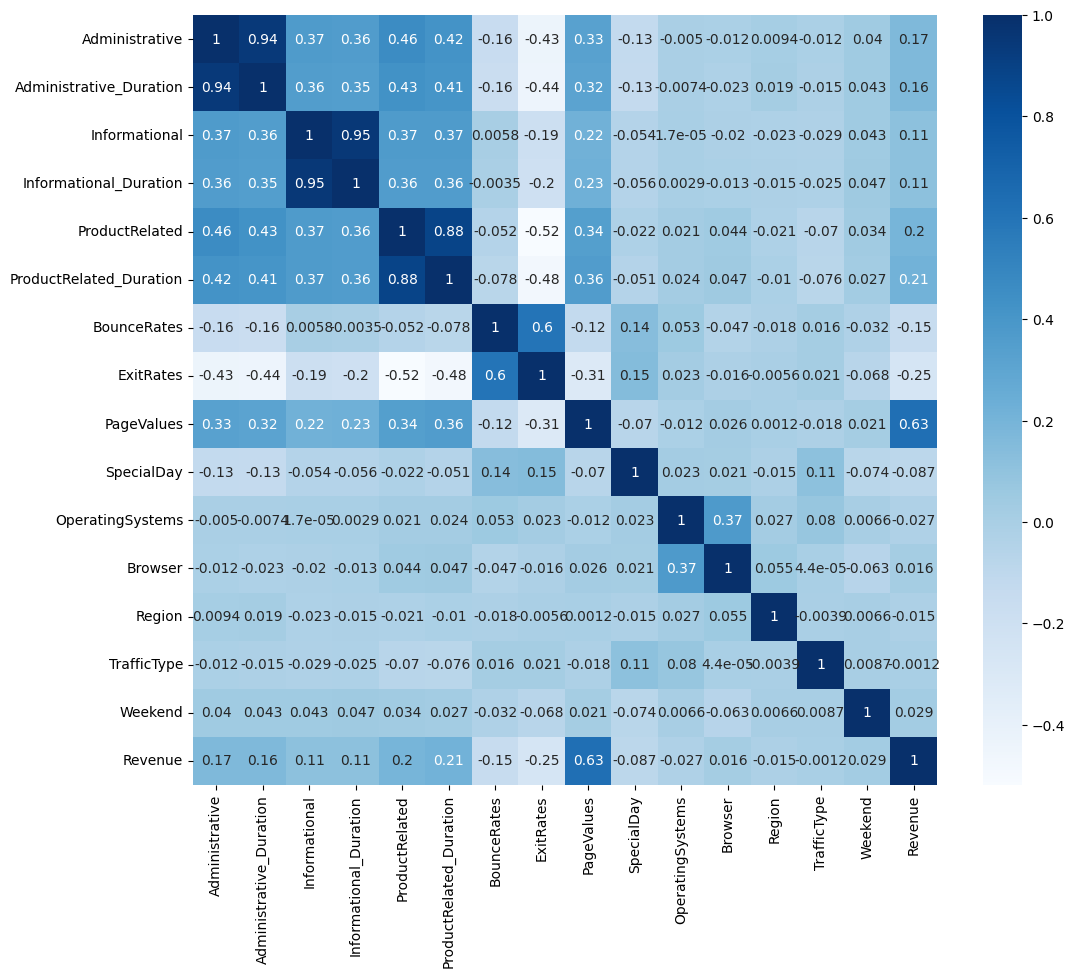

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

df = pd.read_csv(DATASET)

corr = df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(12, 10))

sns.heatmap(corr, cmap="Blues", annot=True);

PageValues больше коррелирует с Revenue

0.63

## Задание 10

Возьмите столбец, который имеет корреляцию с Revenue, равную по модулю 0.14, и проведите анализ этого столбца по аналогии с тем, как вы действовали со столбцом ProductRelated_Duration.

Постройте гистограмму распределения столбца. Какое у него распределение?

возьмем ближайший к 0.14 - BounceRates( Процент страниц, на которых клиент начал посещение и затем покинул сайт без дальнейших действий.)

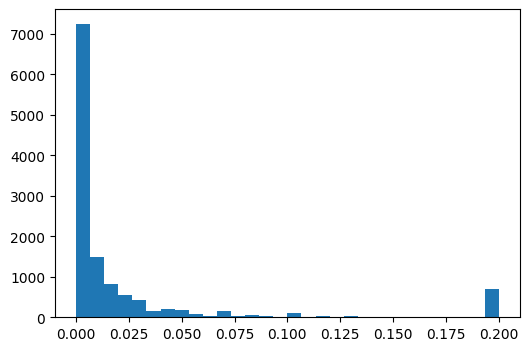

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df['BounceRates'], bins=30)
plt.show()

## Задание 11

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.

<ipython-input-19-c220df0442d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')


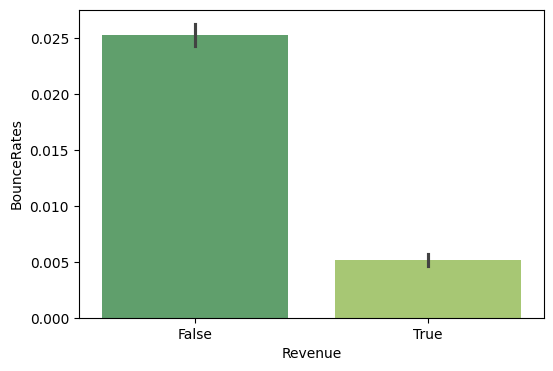

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')
plt.show()

## Задание 12

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

генеративная модель предложила проверить данные на нормальность и их дисперсию и дальше выбрать тест в зависимости от результатов

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
# Разделение данных на группы
bounce_rates_no_purchase = df[df['Revenue'] == False]['BounceRates']
bounce_rates_purchase = df[df['Revenue'] == True]['BounceRates']

# Проверка нормальности распределения
shapiro_no_purchase = shapiro(bounce_rates_no_purchase)
shapiro_purchase = shapiro(bounce_rates_purchase)

# Проверка равенства дисперсий
levene_test = levene(bounce_rates_no_purchase, bounce_rates_purchase)

# Уровень значимости
alpha = 0.05

# Проведение t-теста или теста Манна-Уитни
if shapiro_no_purchase.pvalue > alpha and shapiro_purchase.pvalue > alpha and levene_test.pvalue > alpha:
    ttest_result = ttest_ind(bounce_rates_no_purchase, bounce_rates_purchase)
    p_value = ttest_result.pvalue
    test_result = "T-test"
else:
    mannwhitney_result = mannwhitneyu(bounce_rates_no_purchase, bounce_rates_purchase)
    p_value = mannwhitney_result.pvalue
    test_result = "Mann-Whitney U test"

# Итоговый ответ
if p_value < alpha:
    conclusion = "Различие статистически значимо"
else:
    conclusion = "Различие статистически незначимо"

# Вывод результатов
print(f"Результат {test_result}: p-value = {p_value}")
print(f"Итог: {conclusion}")



Результат Mann-Whitney U test: p-value = 1.832770059117907e-61
Итог: Различие статистически значимо


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10422.
  res = hypotest_fun_out(*samples, **kwds)


## Задание 13

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

Для сравнения средних значений
Т-тест широко используется для сравнения средних значений двух групп и предоставляет мощный инструмент для анализа при выполнении условий нормальности и равенства дисперсий.

Тест Манна-Уитни является хорошей альтернативой t-тесту, когда условия нормальности распределения не выполнены или дисперсии не равны.

## Задание 14

Столбцы OperatingSystems, Browser, Region, TrafficType, Weekend - на самом деле категориальные, а не числовые. Измените тип этих столбцов на `object`.

На данных момент сколько теперь столбцов в таблице имеют тип `object`?

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

df = pd.read_csv(DATASET)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
categorical_columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend']
df[categorical_columns] = df[categorical_columns].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

7

## Задание 15

Переведите Revenue в категории по правилу: True -> Yes, False -> No.

После этого постройте аналог матрицы корреляций между парами категориальных столбцов с помощью V-меры Крамера.

Какой категориальный столбец сильнее всего "коррелирует" с Revenue?



In [ ]:
!pip install association-metrics -q
df['Revenue'] = df['Revenue'].map({True: 'Yes', False: 'No'})

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12131 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  11839 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12231 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:
import association_metrics as am

cramersv = am.CramersV(df_cat)
cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.064298,0.068020,0.047244,0.190853,0.140505,0.064952,0.176845
OperatingSystems,0.064298,1.000000,0.596166,0.118280,0.196568,0.465940,0.120371,0.078006
Browser,0.068020,0.596166,1.000000,0.129814,0.193149,0.510842,0.088742,0.047411
Region,0.047244,0.118280,0.129814,1.000000,0.088634,0.182158,0.030789,0.027394
TrafficType,0.190853,0.196568,0.193149,0.088634,1.000000,0.385082,0.153486,0.173963
VisitorType,0.140505,0.465940,0.510842,0.182158,0.385082,1.000000,0.055071,0.104735
Weekend,0.064952,0.120371,0.088742,0.030789,0.153486,0.055071,1.000000,0.029295
Revenue,0.176845,0.078006,0.047411,0.027394,0.173963,0.104735,0.029295,1.000000


как мы видим, больше всего коррелирует с Revenue - Month

Верните Revenue обратно к типу Bool.

In [ ]:
df['Revenue'] = df['Revenue'].map({'Yes': True, 'No': False})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

## Задание 16

Постройте матрицу $\phi_k$-корреляций всех столбцов в таблице.

Какой фактор сильнее всего коррелирует с Revenue? В ответе укажите значение корреляции, округленное до сотых.

In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.5 MB/s eta 0:00:00


interval columns not set, guessing: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


<Axes: >

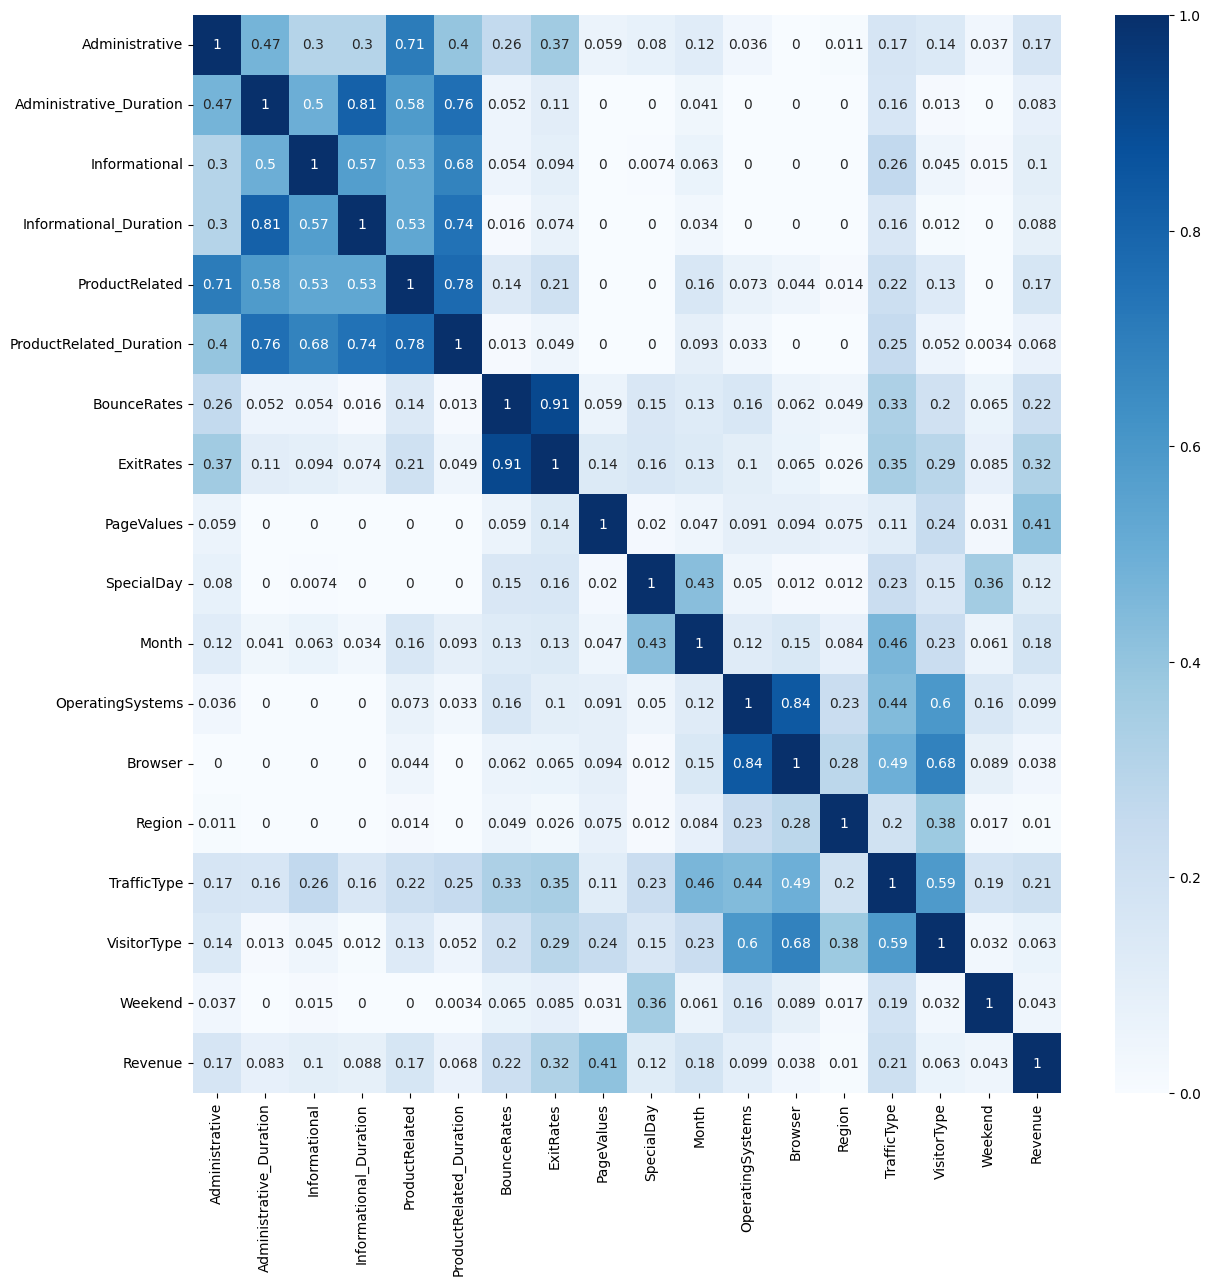

In [ ]:
import phik

plt.figure(figsize=(14,14))

ph = df.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

PageValues = 0.41

## Задание 17

Постройте любой из рассмотренных в первом занятии курса дашборд по данным, сохраните его в html и скачайте себе на компьютер.

Выложите файл с дашбордом на яндекс/гугл-диск и прикрепите ссылку на него в этом задании.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.8 MB 32.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.9 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
profile_report.to_file("pandas_profiling.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

https://disk.yandex.ru/d/eCRVsPZu9v3LsQ

## Задание 18

Наша цель - понять, какие факторы сильнее всего влияют на Revenue и почему.

Проанализируйте построенный дашборд и ответьте текстом на вопросы:

1) Есть ли проблемы в данных (пропуски, дубли, выбросы, ошибочные значения)?

2) Какие три фактора имеют наиболее сильное влияние на Revenue?

3) Постарайтесь описать смысл каждого из этих факторов, а также для каждого из этих факторов объясните по смыслу, почему он сильно влияет на Revenue

4) Укажите два наиболее коррелирующих между собой фактора (без учета Revenue) и объясните, почему между ними такая большая корреляция?

1) Довольно много пропусков и дублей, а также есть столбец, который имеет дисбалансные данные
Еще несколько столбцов содержат слишком много нулей

2)Bounce Rates, PageValues, ExitRates

3)ExitRates: процент пользователей, которые заканчивают свою сессию на определенной странице.

BounceRates: процент пользователей, которые покидают сайт после просмотра одной страницы, то есть "отскакивают"

Page Value: среднее значение страницы, которую посетил пользователь перед завершением транзакции.

4)

## Полезные доп. материалы

* [Введение в проверку гипотез (кратко)](https://www.codecamp.ru/blog/hypothesis-testing/)

* [Введение в проверку гипотез (подробнее)](https://law.bsu.by/pub/11/barvenov_4.pdf)

* [Основные виды распределений](https://habr.com/ru/articles/801101/)